# No Canyon case - run03

Run03 has a straight shelf and fixed values for u and v at the east and west boundaries. These velocities come from a cross-shelf section in run42 (base case with no canyon,new viscosity) on day 3 of the simulation.

I will compare this run to CNTDIFF/run42, the base case with no canyon. 

In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [2]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# State and ptracer files for runs with fixed boundaries 
state_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/stateGlob.nc'
ptracers_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/ptracersGlob.nc'

state_01 = xr.open_dataset(state_file01)
ptracers_01 = xr.open_dataset(ptracers_file01)

# files for original run with body forcing
state_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 
ptracers_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

state_bf = xr.open_dataset(state_file_bf)
ptracers_bf = xr.open_dataset(ptracers_file_bf)

## What did the model read?

In [3]:
# Velocities
u_Wbdy_01 = state_01.U.isel(Xp1=0, T=0)
v_Wbdy_01 = state_01.V.isel(X=0, T=0)

u_Ebdy_01 = state_01.U.isel(Xp1=360, T=0)
v_Ebdy_01 = state_01.V.isel(X=359, T=0)


# Base case at day 3
u_Wbdy_bf = state_bf.U.isel(Xp1=0, T=6)
v_Wbdy_bf = state_bf.V.isel(X=0, T=6)

u_Ebdy_bf = state_bf.U.isel(Xp1=360, T=6)
v_Ebdy_bf = state_bf.V.isel(X=359, T=6)

# Tracers
Temp_01 = state_01.Temp.isel(X=180, T=0)
S_01 = state_01.S.isel(X=180, T=0)
Tr_01 = ptracers_01.Tr1.isel(X=180, T=0)


Temp_bf = state_bf.Temp.isel(X=180, T=6)
S_bf = state_bf.S.isel(X=180, T=6)
Tr_bf = ptracers_bf.Tr1.isel(X=180, T=6)


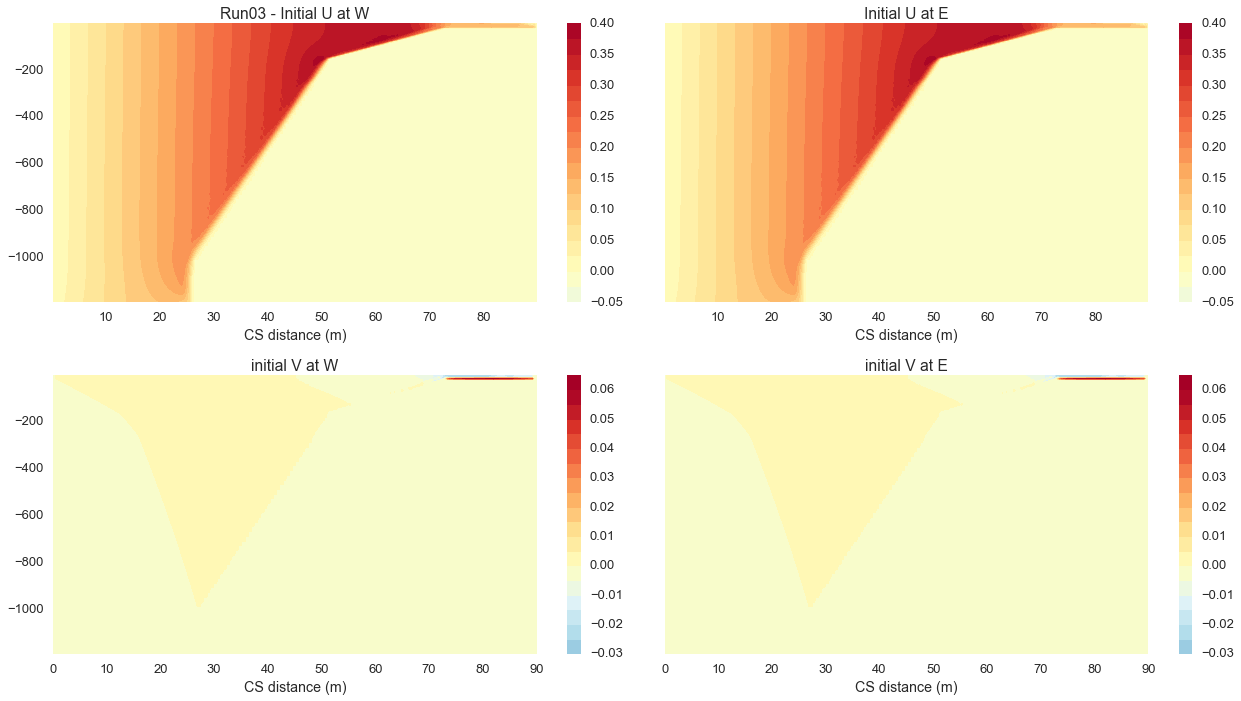

In [4]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_01,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Run03 - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_01,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_01,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_01,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


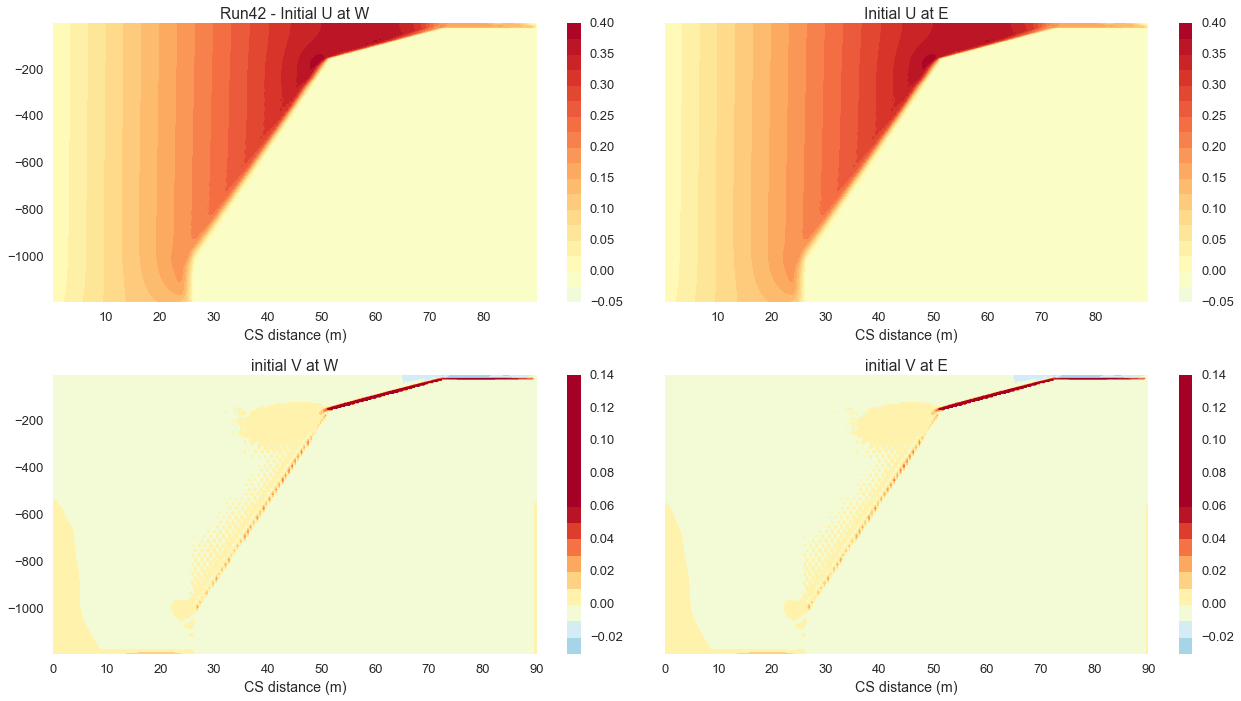

In [5]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_bf,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Run42 - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_bf,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_bf,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_bf,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


U and V at the boundaries for run42 at day 3. Below I plot the anomaly (run03 - run42).

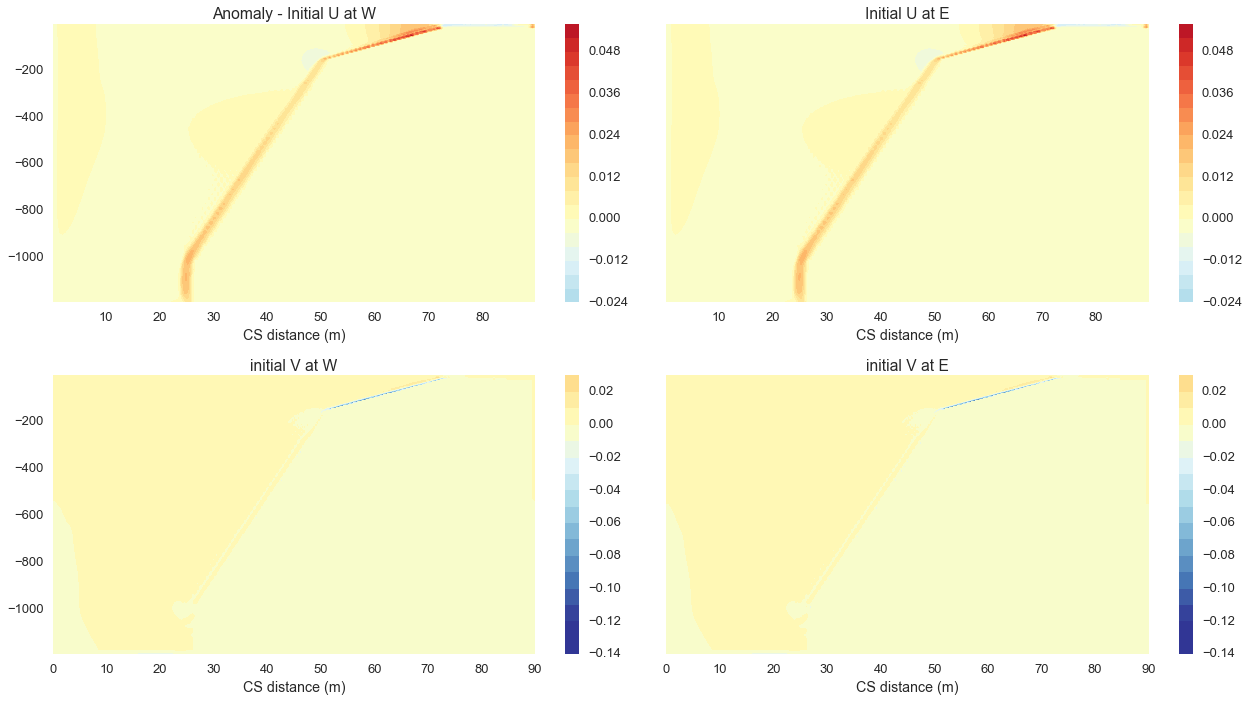

In [7]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_01-u_Wbdy_bf,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Anomaly - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_01-v_Wbdy_bf,20,
                       vmin=-0.12, vmax=0.12, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_01-u_Ebdy_bf,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_01-v_Ebdy_bf,20,
                       vmin=-0.12, vmax=0.12, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


* The alongshore velocity is larger on the shelf for run01 by 0.03 m/s.  Also , alongshore velocity is consistently larger near the bottom for run03 by 0.03 m/s. This differences are about 7% of the max alongshore velocities.

* Cross-shore velocities at the boundaries are larger in the base case by 0.12 m/s near the shelf bottom, but lower everywhere else by 0.02.


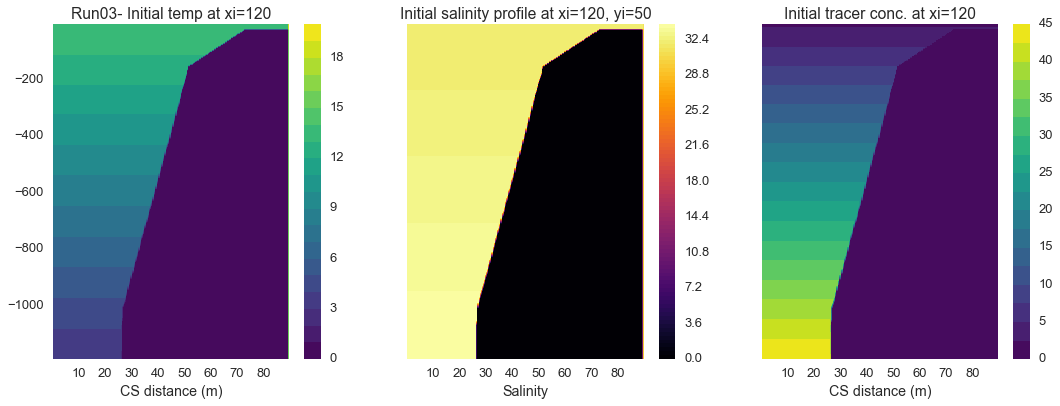

In [8]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_01,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Run03- Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Y/1000,grid.RC,S_01,100, cmap = 'inferno')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_01,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')



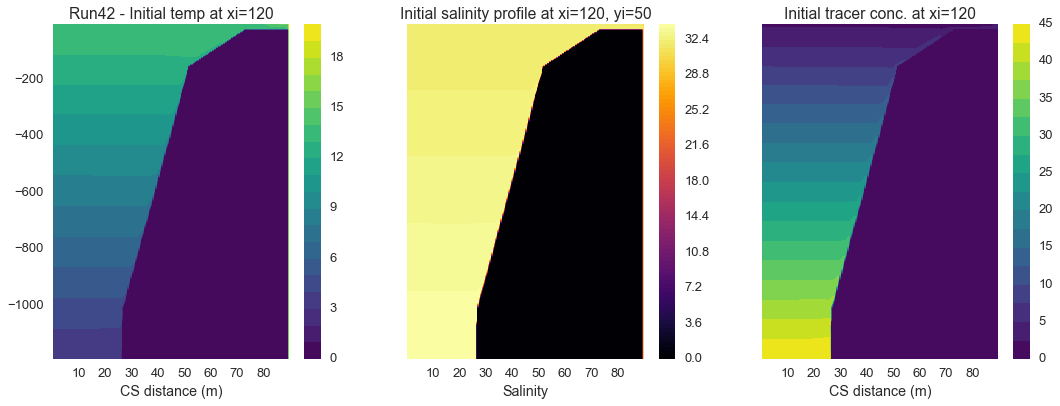

In [9]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_bf,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Run42 - Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Y/1000,grid.RC,S_bf,100, cmap = 'inferno')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_bf,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')


The initial tremperature, salinity and tracer profiles are linear for run03 and tilted by upwelling in run42.

 ###  U and V from body forcing vs  fixed boundaries 

In [10]:
# fixed bdy case - boundaries on day 3
u_Wbdy_d3 = state_01.U.isel(Xp1=2, T=6)
v_Wbdy_d3 = state_01.V.isel(X=2, T=6)

u_Ebdy_d3 = state_01.U.isel(Xp1=357, T=6)
v_Ebdy_d3 = state_01.V.isel(X=357, T=6)

# fixed bdy case - boundaries on day 6
u_Wbdy_d6 = state_01.U.isel(Xp1=2, T=12)
v_Wbdy_d6 = state_01.V.isel(X=2, T=12)

u_Ebdy_d6 = state_01.U.isel(Xp1=357, T=12)
v_Ebdy_d6 = state_01.V.isel(X=357, T=12)

# fixed bdy case - boundaries on day 9
u_Wbdy_d9 = state_01.U.isel(Xp1=2, T=18)
v_Wbdy_d9 = state_01.V.isel(X=2, T=18)

u_Ebdy_d9 = state_01.U.isel(Xp1=357, T=18)
v_Ebdy_d9 = state_01.V.isel(X=357, T=18)


# fixed bdy case - mid alongshore distance, day 3
u_mid_d3 = state_01.U.isel(Xp1=180, T=6)
v_mid_d3 = state_01.V.isel(X=180, T=6)

# fixed bdy case - mid alongshore distance, day 6
u_mid_d6 = state_01.U.isel(Xp1=180, T=12)
v_mid_d6 = state_01.V.isel(X=180, T=12)

# fixed bdy case - mid alongshore distance, day 9
u_mid_d9 = state_01.U.isel(Xp1=180, T=18)
v_mid_d9 = state_01.V.isel(X=180, T=18)

# body forcing case on day 3
ubf_Wbdy_d3 = state_bf.U.isel(Xp1=2, T=6)
vbf_Wbdy_d3 = state_bf.V.isel(X=2, T=6)

ubf_Ebdy_d3 = state_bf.U.isel(Xp1=357, T=6)
vbf_Ebdy_d3 = state_bf.V.isel(X=357, T=6)

# body forcing case on day 6
ubf_Wbdy_d6 = state_bf.U.isel(Xp1=2, T=12)
vbf_Wbdy_d6 = state_bf.V.isel(X=2, T=12)

ubf_Ebdy_d6 = state_bf.U.isel(Xp1=357, T=12)
vbf_Ebdy_d6 = state_bf.V.isel(X=357, T=12)

# body forcing case on day 9
ubf_Wbdy_d9 = state_bf.U.isel(Xp1=2, T=18)
vbf_Wbdy_d9 = state_bf.V.isel(X=2, T=18)

ubf_Ebdy_d9 = state_bf.U.isel(Xp1=357, T=18)
vbf_Ebdy_d9 = state_bf.V.isel(X=357, T=18)

# body forcing case - mid alongshore distance, day 3
ubf_mid_d3 = state_bf.U.isel(Xp1=180, T=6)
vbf_mid_d3 = state_bf.V.isel(X=180, T=6)

# body forcing case - mid alongshore distance, day 6
ubf_mid_d6 = state_bf.U.isel(Xp1=180, T=12)
vbf_mid_d6 = state_bf.V.isel(X=180, T=12)

# body forcing case - mid alongshore distance, day 9
ubf_mid_d9 = state_bf.U.isel(Xp1=180, T=18)
vbf_mid_d9 = state_bf.V.isel(X=180, T=18)


Day 3 vs day 3


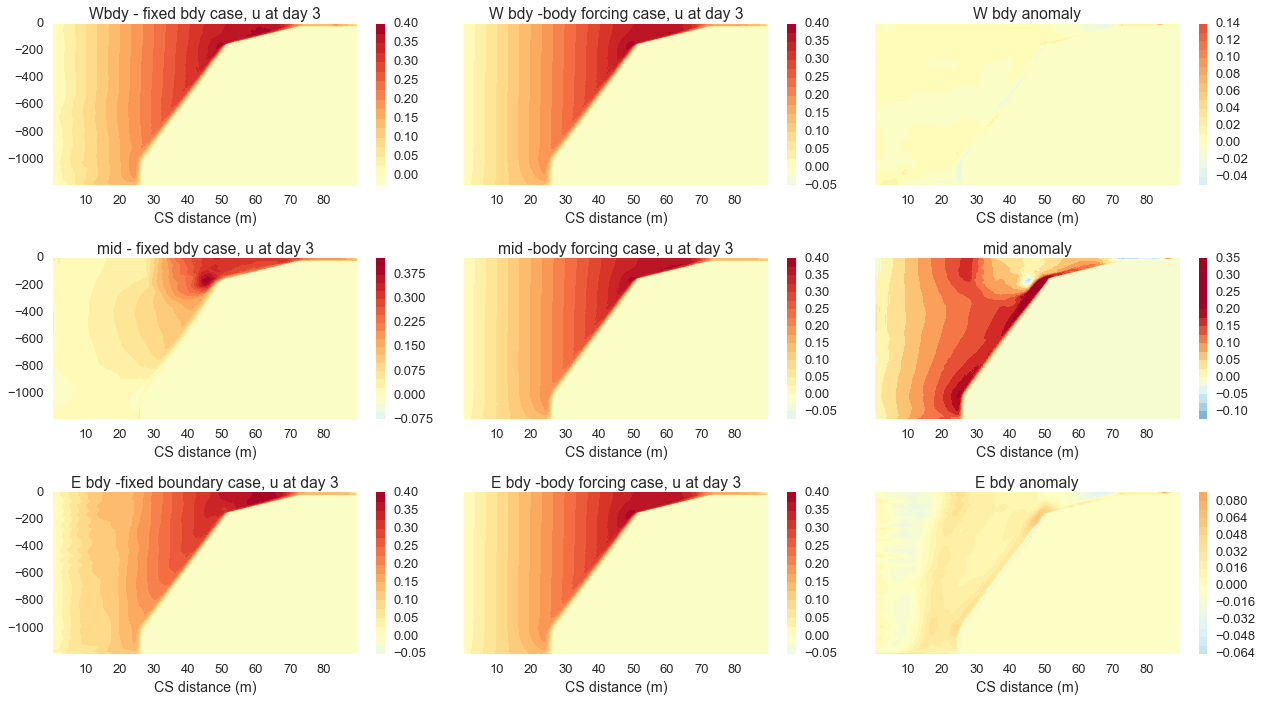

In [11]:
print('Day 3 vs day 3')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Wbdy - fixed bdy case, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d3-u_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d3-u_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d3-u_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


In this plot alongshore velocity of the fixed boundary case on day 3 is compared to alongshore volocity of the body forcing case on day 3. 

I plotted $u$ close to the west boundary at the top, mid alongshore distance in the middle and u close to the east boundary at the bottom. The plots for the fixed boundary case are on the left column; the ones for the body forcing case are on the center; and the anomalies, that is $u_{BF}-u_{fix}$, are on the right.

Near the boundaries, both flows are similar in structure, but the shelf current in the BF case is stronger by about 25% at the shelf break and about 10% more intense on the slope. Also, the shelf current is less intense in the BF case than in the FBdy case.

The alongshore velocity at mid alongshore distance in the fixed boundary case decreases dramatically on the slope with respect to the BF case!

Day 3 body forcing vs day 6 fixed boundaries


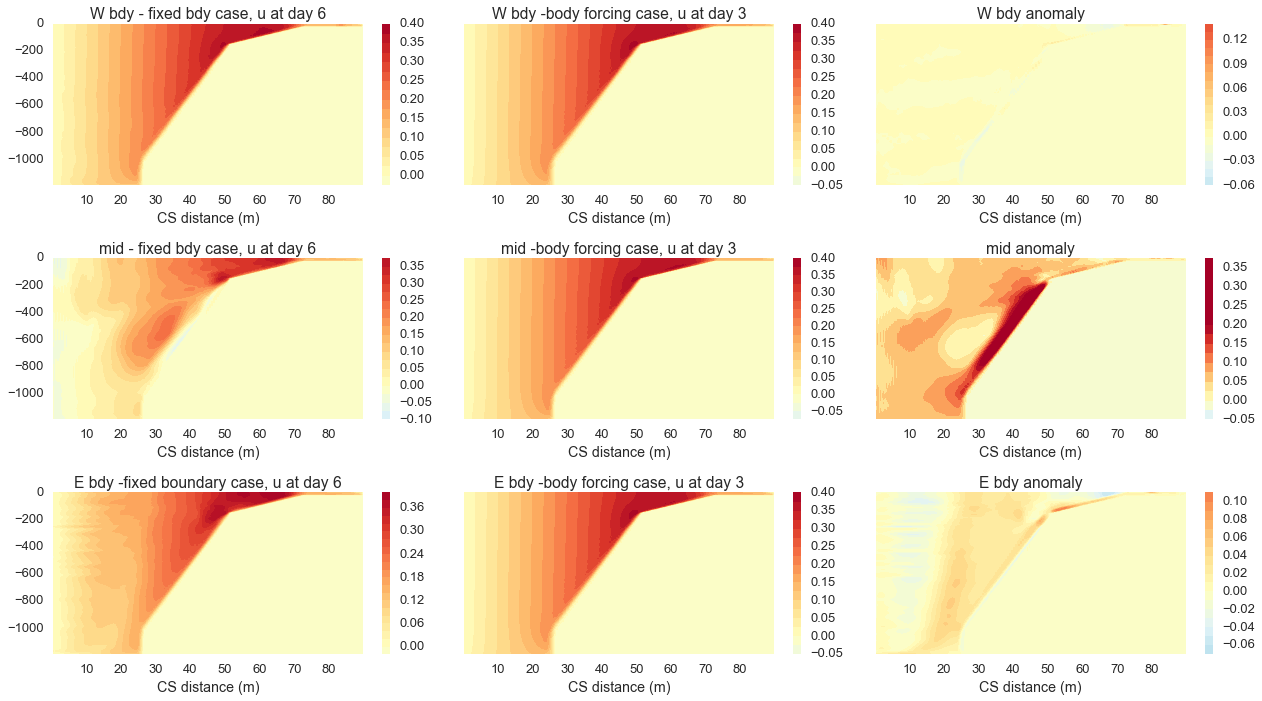

In [12]:
print('Day 3 body forcing vs day 6 fixed boundaries')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 3')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d3-u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d3-u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d3-u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


Day 6 body forcing vs day 6 fixed boundaries


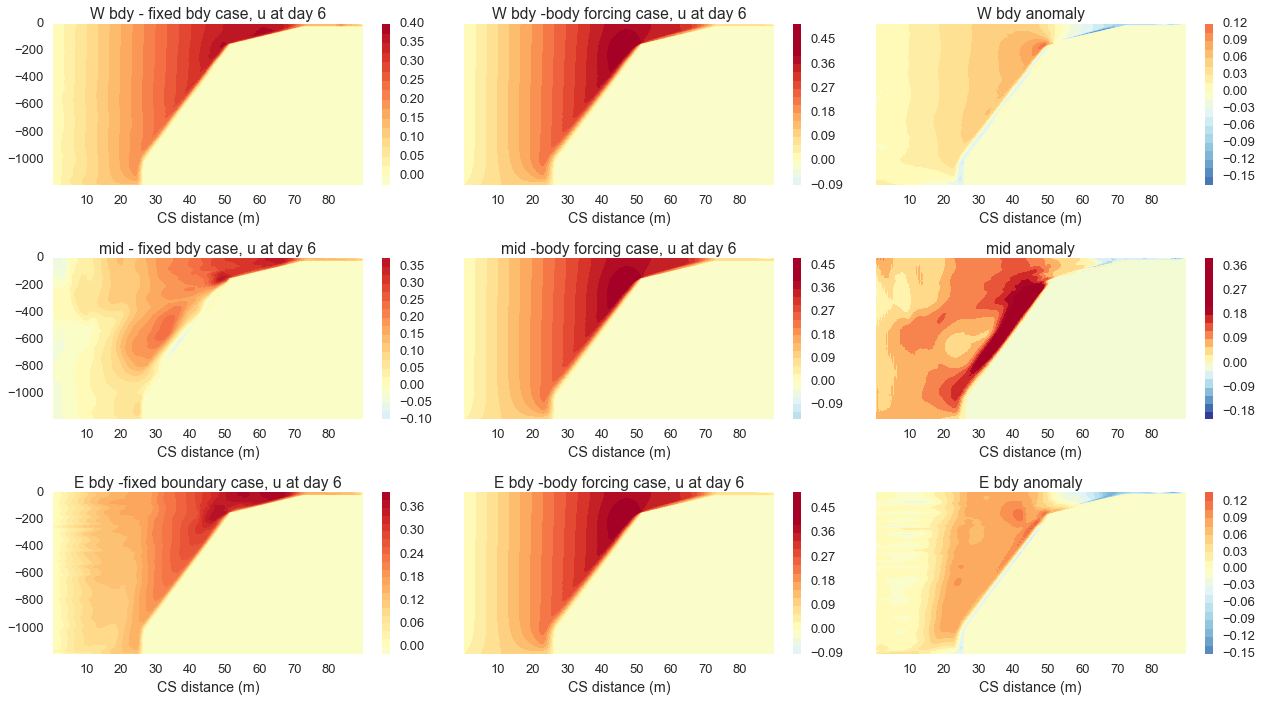

In [13]:
print('Day 6 body forcing vs day 6 fixed boundaries')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6-u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d6-u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6-u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


Day 9 body forcing vs day 9 fixed boundaries


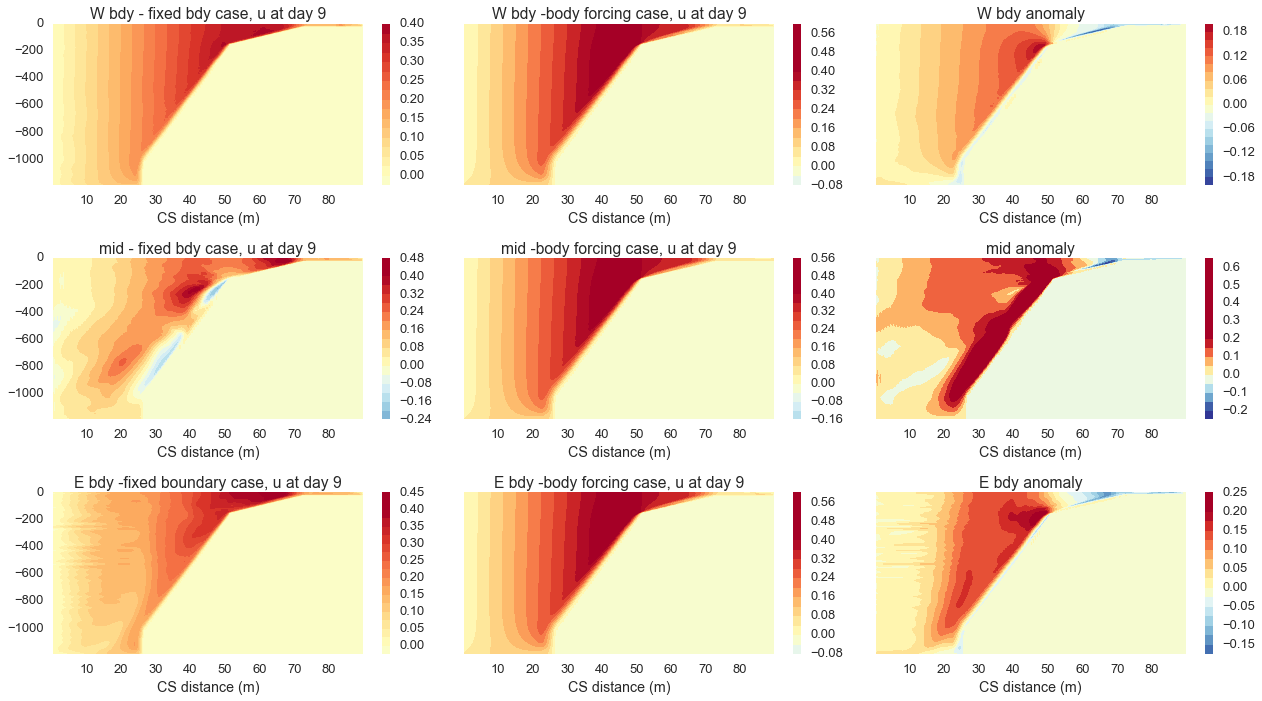

In [14]:
print('Day 9 body forcing vs day 9 fixed boundaries')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 9')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 9')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 9')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 9')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 9')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 9')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d9-u_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d9-u_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d9-u_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


In this plot alongshore velocity of the fixed boundary case on day 9 is compared to alongshore volocity of the body forcing case on day 9. 

* The body forcing case has accelerated! (Because there is some body forcing still pushing). 

* The fixed boundary case developed a small countercurrent on the slope at mid distance.

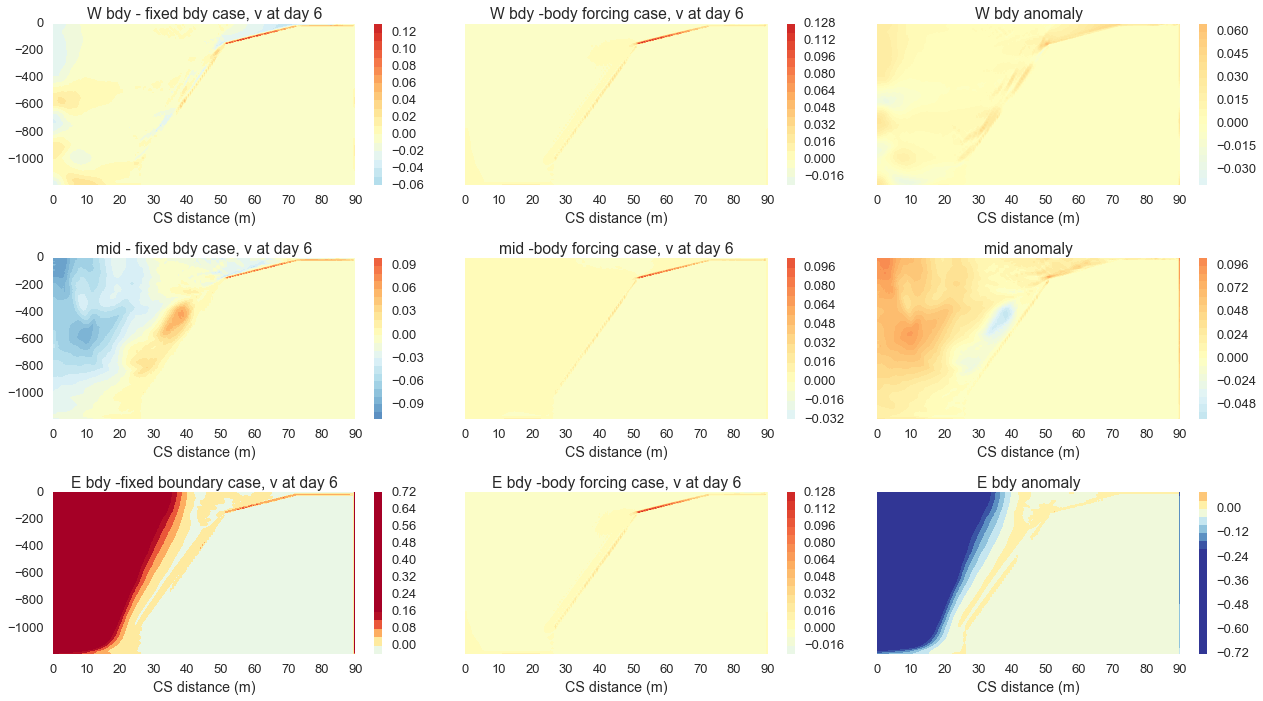

In [15]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, v at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, v at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, v at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Yp1/1000,grid.RC,vbf_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, v at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,vbf_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, v at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Yp1/1000,grid.RC,vbf_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, v at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Yp1/1000,grid.RC,vbf_Wbdy_d6-v_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Yp1/1000,grid.RC,vbf_mid_d6-v_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Yp1/1000,grid.RC,vbf_Ebdy_d6-v_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


What is this, precious!!??

## Top views of u and v

In [16]:
# fixed bdy case - boundaries on day 3
u_surf_d3 = state_01.U.isel(Z=5, T=6)
v_surf_d3 = state_01.V.isel(Z=5, T=6)

u_shlf_d3 = state_01.U.isel(Z=25, T=6)
v_shlf_d3 = state_01.V.isel(Z=25, T=6)

# fixed bdy case - boundaries on day 6
u_surf_d6 = state_01.U.isel(Z=5, T=12)
v_surf_d6 = state_01.V.isel(Z=5, T=12)

u_shlf_d6 = state_01.U.isel(Z=25, T=12)
v_shlf_d6 = state_01.V.isel(Z=25, T=12)

# fixed bdy case - boundaries on day 9
u_surf_d9 = state_01.U.isel(Z=5, T=18)
v_surf_d9 = state_01.V.isel(Z=5, T=18)

u_shlf_d9 = state_01.U.isel(Z=25, T=18)
v_shlf_d9 = state_01.V.isel(Z=25, T=18)


# fixed bdy case - mid alongshore distance, day 3
u_cny_d3 = state_01.U.isel(Z=32, T=6)
v_cny_d3 = state_01.V.isel(Z=32, T=6)

# fixed bdy case - mid alongshore distance, day 6
u_cny_d6 = state_01.U.isel(Z=32, T=12)
v_cny_d6 = state_01.V.isel(Z=32, T=12)

# fixed bdy case - mid alongshore distance, day 9
u_cny_d9 = state_01.U.isel(Z=32, T=18)
v_cny_d9 = state_01.V.isel(Z=32, T=18)

# body forcing case on day 3
ubf_surf_d3 = state_bf.U.isel(Z=5, T=6)
vbf_surf_d3 = state_bf.V.isel(Z=5, T=6)

ubf_shlf_d3 = state_bf.U.isel(Z=25, T=6)
vbf_shlf_d3 = state_bf.V.isel(Z=25, T=6)

# body forcing case on day 6
ubf_surf_d6 = state_bf.U.isel(Z=5, T=12)
vbf_surf_d6 = state_bf.V.isel(Z=5, T=12)

ubf_shlf_d6 = state_bf.U.isel(Z=25, T=12)
vbf_shlf_d6 = state_bf.V.isel(Z=25, T=12)

# body forcing case on day 9
ubf_surf_d9 = state_bf.U.isel(Z=5, T=18)
vbf_surf_d9 = state_bf.V.isel(Z=5, T=18)

ubf_shlf_d9 = state_bf.U.isel(Z=25, T=18)
vbf_shlf_d9 = state_bf.V.isel(Z=25, T=18)

# body forcing case - mid alongshore distance, day 3
ubf_cny_d3 = state_bf.U.isel(Z=32, T=6)
vbf_cny_d3 = state_bf.V.isel(Z=32, T=6)

# body forcing case - mid alongshore distance, day 6
ubf_cny_d6 = state_bf.U.isel(Z=32, T=12)
vbf_cny_d6 = state_bf.V.isel(Z=32, T=12)

# body forcing case - mid alongshore distance, day 9
ubf_cny_d9 = state_bf.U.isel(Z=32, T=18)
vbf_cny_d9 = state_bf.V.isel(Z=32, T=18)

### U

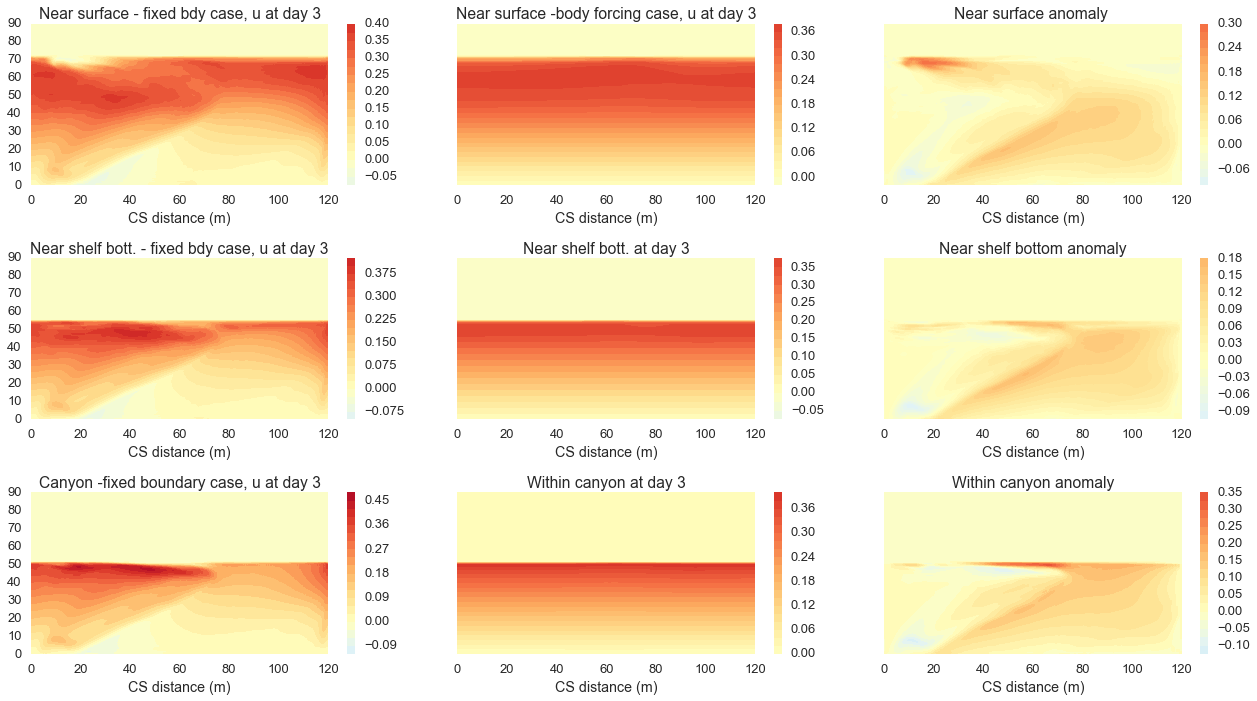

In [17]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - fixed bdy case, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -body forcing case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d3-u_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d3-u_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d3-u_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

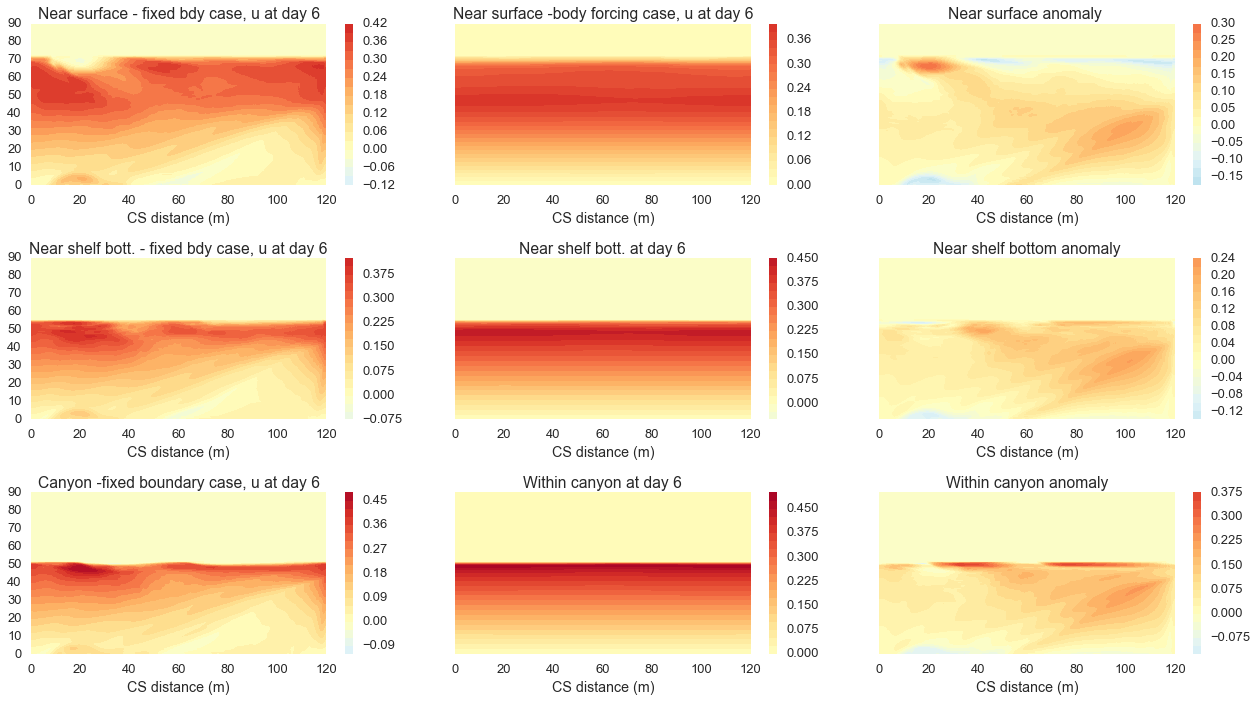

In [18]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - fixed bdy case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -body forcing case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d6-u_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d6-u_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d6-u_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

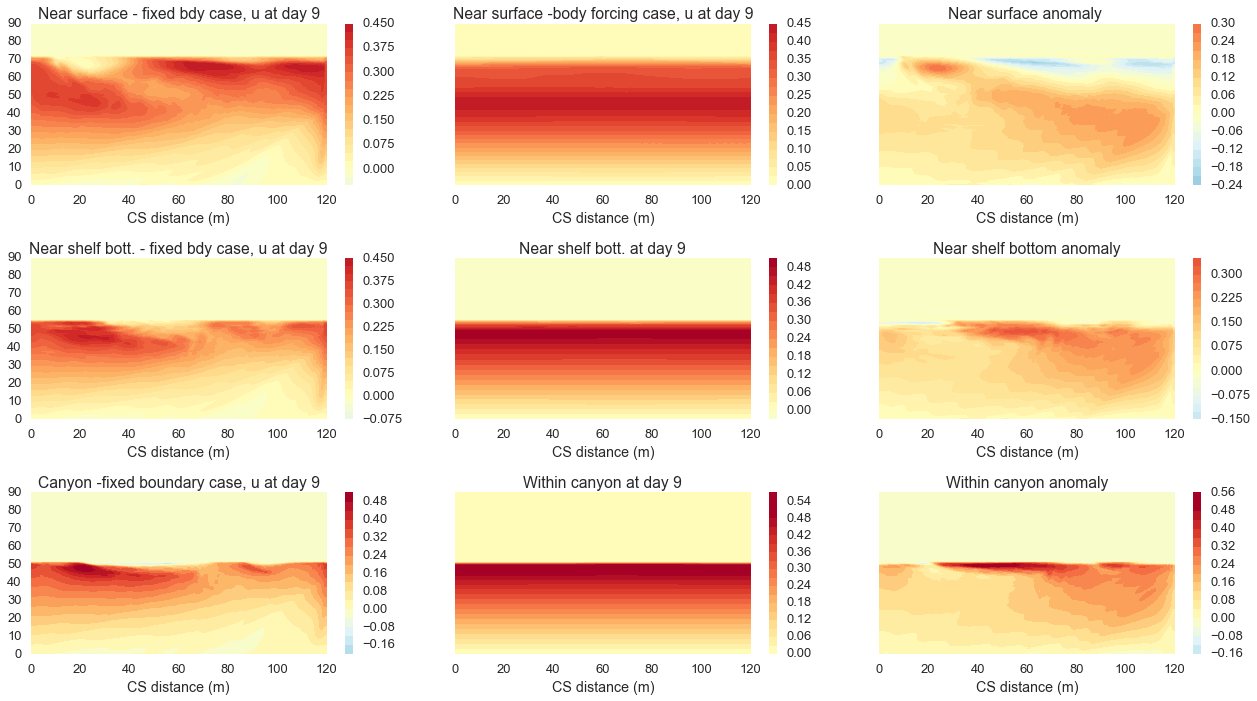

In [19]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, u at day 9')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - fixed bdy case, u at day 9')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, u at day 9')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -body forcing case, u at day 9')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 9')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 9')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_surf_d9-u_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_shlf_d9-u_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,ubf_cny_d9-u_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

What is that weird hole near the surface on the left of the fixed boundary case?

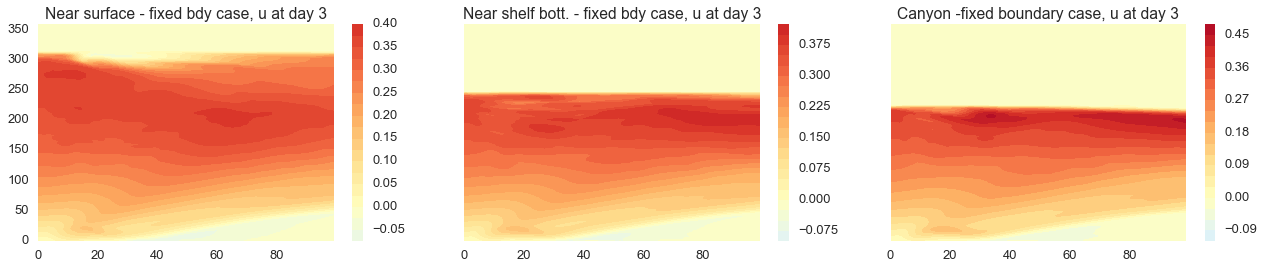

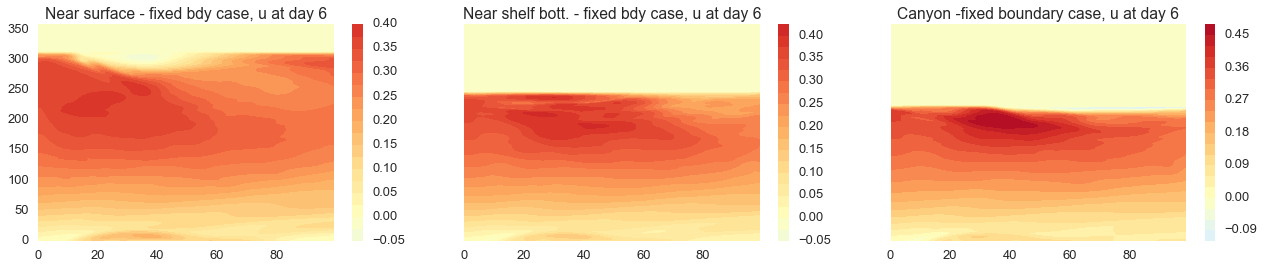

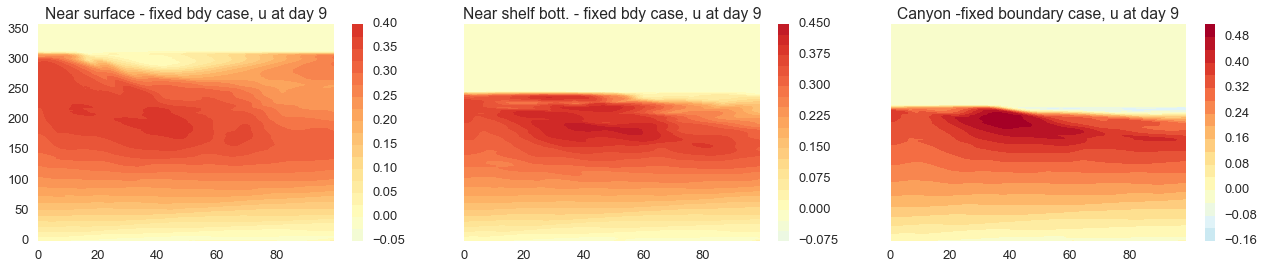

In [20]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(u_surf_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, u at day 3')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(u_shlf_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, u at day 3')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(u_cny_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, u at day 3')
ax[2].set_xlabel('')


plt.tight_layout()


sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(u_surf_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, u at day 6')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(u_shlf_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, u at day 6')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(u_cny_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, u at day 6')
ax[2].set_xlabel('')


plt.tight_layout()

sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(u_surf_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, u at day 9')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(u_shlf_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, u at day 9')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(u_cny_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, u at day 9')
ax[2].set_xlabel('')


plt.tight_layout()

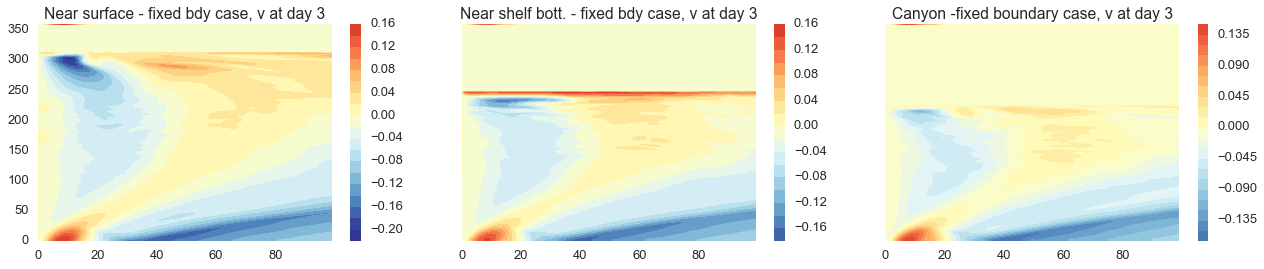

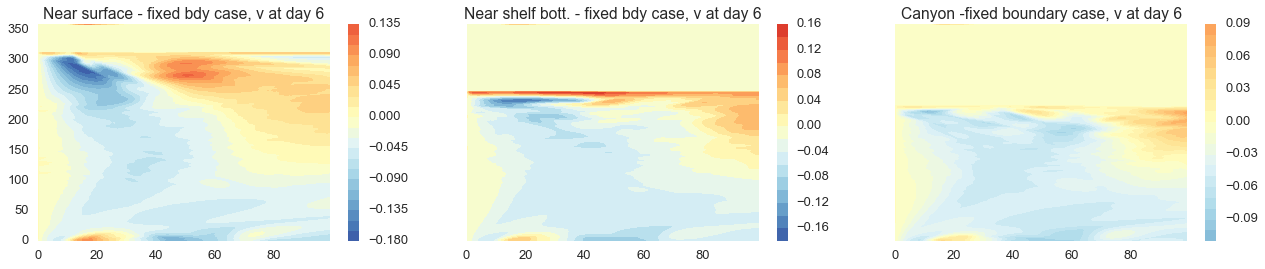

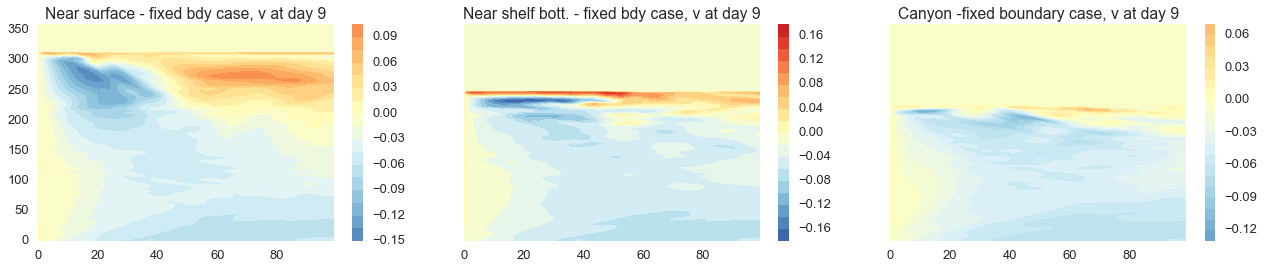

In [21]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(v_surf_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, v at day 3')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(v_shlf_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, v at day 3')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(v_cny_d3[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, v at day 3')
ax[2].set_xlabel('')


plt.tight_layout()


sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(v_surf_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, v at day 6')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(v_shlf_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, v at day 6')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(v_cny_d6[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, v at day 6')
ax[2].set_xlabel('')


plt.tight_layout()

sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,4), sharey = True)

cf1 = ax[0].contourf(v_surf_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Near surface - fixed bdy case, v at day 9')
ax[0].set_xlabel('')

cf2 = ax[1].contourf(v_shlf_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Near shelf bott. - fixed bdy case, v at day 9')
ax[1].set_xlabel('')

cf3 = ax[2].contourf(v_cny_d9[:,0:100],20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Canyon -fixed boundary case, v at day 9')
ax[2].set_xlabel('')


plt.tight_layout()

### V

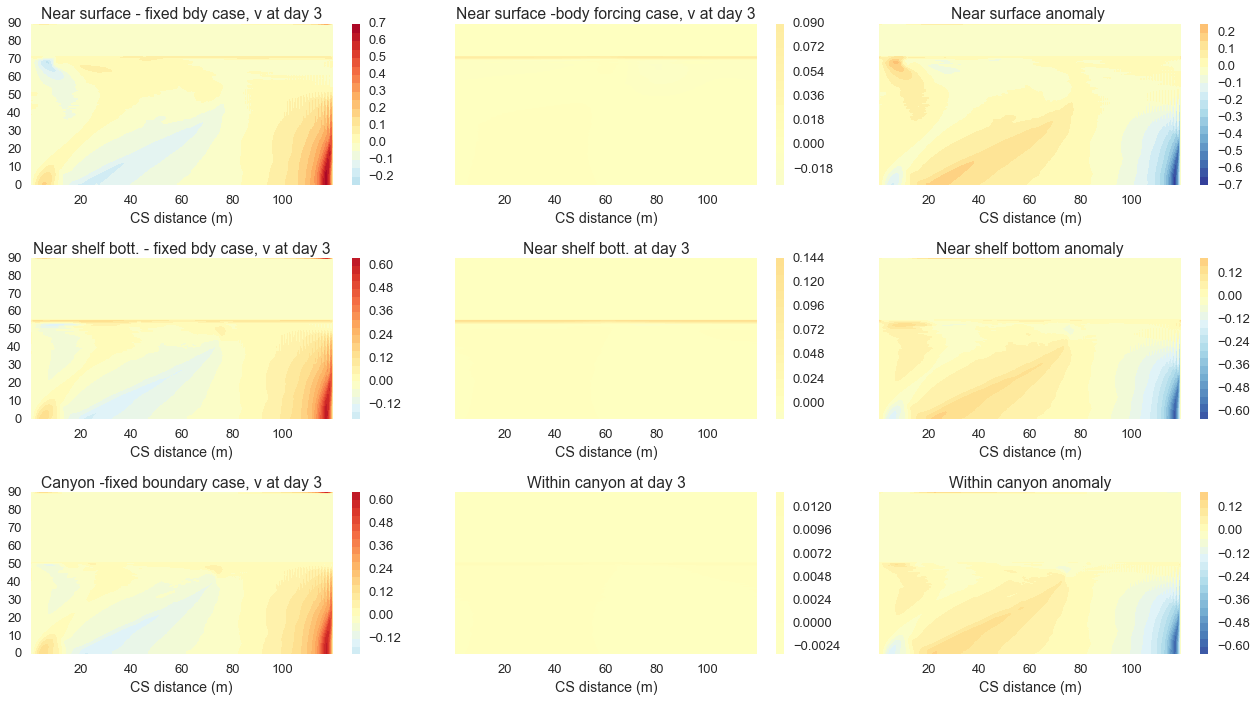

In [22]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, v at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - fixed bdy case, v at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, v at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -body forcing case, v at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_surf_d3-v_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_shlf_d3-v_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_cny_d3-v_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

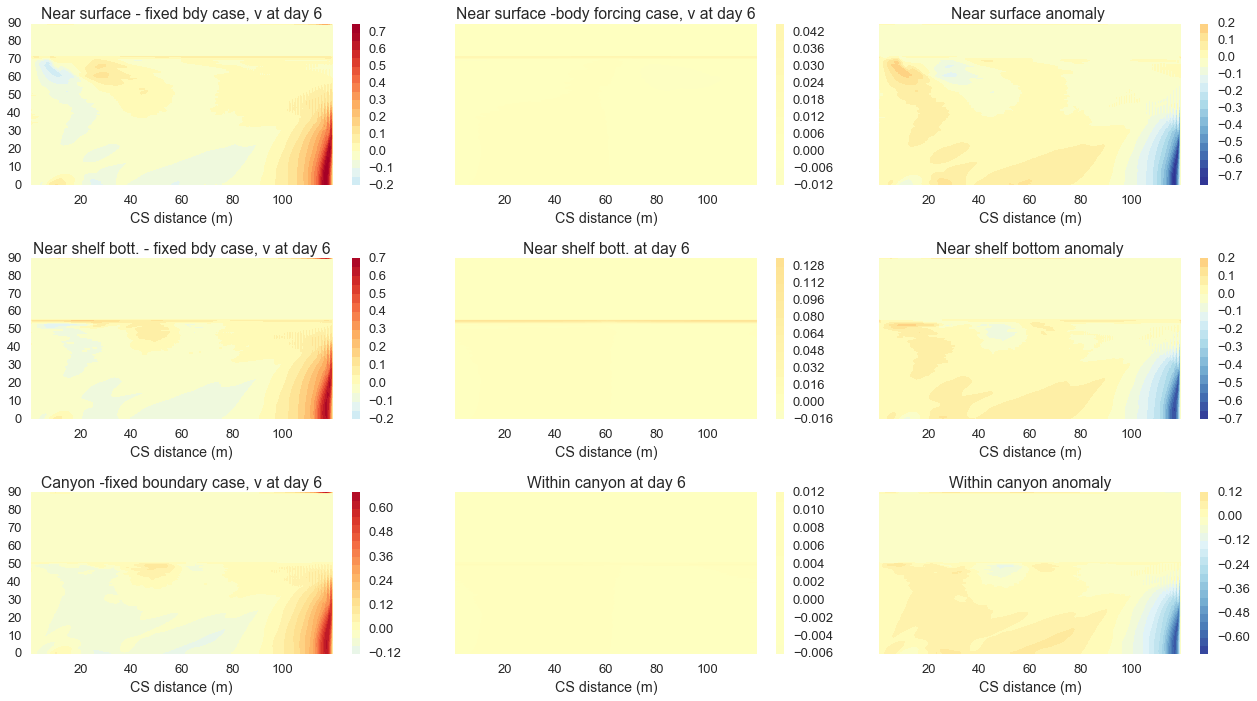

In [23]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, v at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - fixed bdy case, v at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, v at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -body forcing case, v at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vbf_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_surf_d6-v_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_shlf_d6-v_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,vbf_cny_d6-v_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


## Tracers

In [24]:
# fixed bdy case - day 3
T_Wbdy_d3 = state_01.Temp.isel(X=2, T=6)
S_Wbdy_d3 = state_01.S.isel(X=2, T=6)
Tr_Wbdy_d3 = ptracers_01.Tr1.isel(X=2, T=6)

T_Ebdy_d3 = state_01.Temp.isel(X=357, T=6)
S_Ebdy_d3 = state_01.S.isel(X=357, T=6)
Tr_Ebdy_d3 = ptracers_01.Tr1.isel(X=357, T=6)

T_mid_d3 = state_01.Temp.isel(X=180, T=6)
S_mid_d3 = state_01.S.isel(X=180, T=6)
Tr_mid_d3 = ptracers_01.Tr1.isel(X=180, T=6)

# fixed bdy case - day 6
T_Wbdy_d6 = state_01.Temp.isel(X=2, T=12)
S_Wbdy_d6 = state_01.S.isel(X=2, T=12)
Tr_Wbdy_d6 = ptracers_01.Tr1.isel(X=2, T=12)

T_Ebdy_d6 = state_01.Temp.isel(X=357, T=12)
S_Ebdy_d6 = state_01.S.isel(X=357, T=12)
Tr_Ebdy_d6 = ptracers_01.Tr1.isel(X=357, T=12)

T_mid_d6 = state_01.Temp.isel(X=180, T=12)
S_mid_d6 = state_01.S.isel(X=180, T=12)
Tr_mid_d6 = ptracers_01.Tr1.isel(X=180, T=12)

# fixed bdy case -  day 9
T_Wbdy_d9 = state_01.Temp.isel(X=2, T=18)
S_Wbdy_d9 = state_01.S.isel(X=2, T=18)
Tr_Wbdy_d9 = ptracers_01.Tr1.isel(X=2, T=18)

T_Ebdy_d9 = state_01.Temp.isel(X=357, T=18)
S_Ebdy_d9 = state_01.S.isel(X=357, T=18)
Tr_Ebdy_d9 = ptracers_01.Tr1.isel(X=357, T=18)

T_mid_d9 = state_01.Temp.isel(X=180, T=18)
S_mid_d9 = state_01.S.isel(X=180, T=18)
Tr_mid_d9 = ptracers_01.Tr1.isel(X=180, T=18)


In [25]:
# BF case -  day 6
Tbf_Wbdy_d6 = state_bf.Temp.isel(X=2, T=12)
Sbf_Wbdy_d6 = state_bf.S.isel(X=2, T=12)
Trbf_Wbdy_d6 = ptracers_bf.Tr1.isel(X=2, T=12)

Tbf_Ebdy_d6 = state_bf.Temp.isel(X=357, T=12)
Sbf_Ebdy_d6 = state_bf.S.isel(X=357, T=12)
Trbf_Ebdy_d6 = ptracers_bf.Tr1.isel(X=357, T=12)

Tbf_mid_d6 = state_bf.Temp.isel(X=180, T=12)
Sbf_mid_d6 = state_bf.S.isel(X=180, T=12)
Trbf_mid_d6 = ptracers_bf.Tr1.isel(X=180, T=12)

#  BF -  day 9
Tbf_Wbdy_d9 = state_bf.Temp.isel(X=2, T=18)
Sbf_Wbdy_d9 = state_bf.S.isel(X=2, T=18)
Trbf_Wbdy_d9 = ptracers_bf.Tr1.isel(X=2, T=18)

Tbf_Ebdy_d9 = state_bf.Temp.isel(X=357, T=18)
Sbf_Ebdy_d9 = state_bf.S.isel(X=357, T=18)
Trbf_Ebdy_d9 = ptracers_bf.Tr1.isel(X=357, T=18)

Tbf_mid_d9 = state_bf.Temp.isel(X=180, T=18)
Sbf_mid_d9 = state_bf.S.isel(X=180, T=18)
Trbf_mid_d9 = ptracers_bf.Tr1.isel(X=180, T=18)


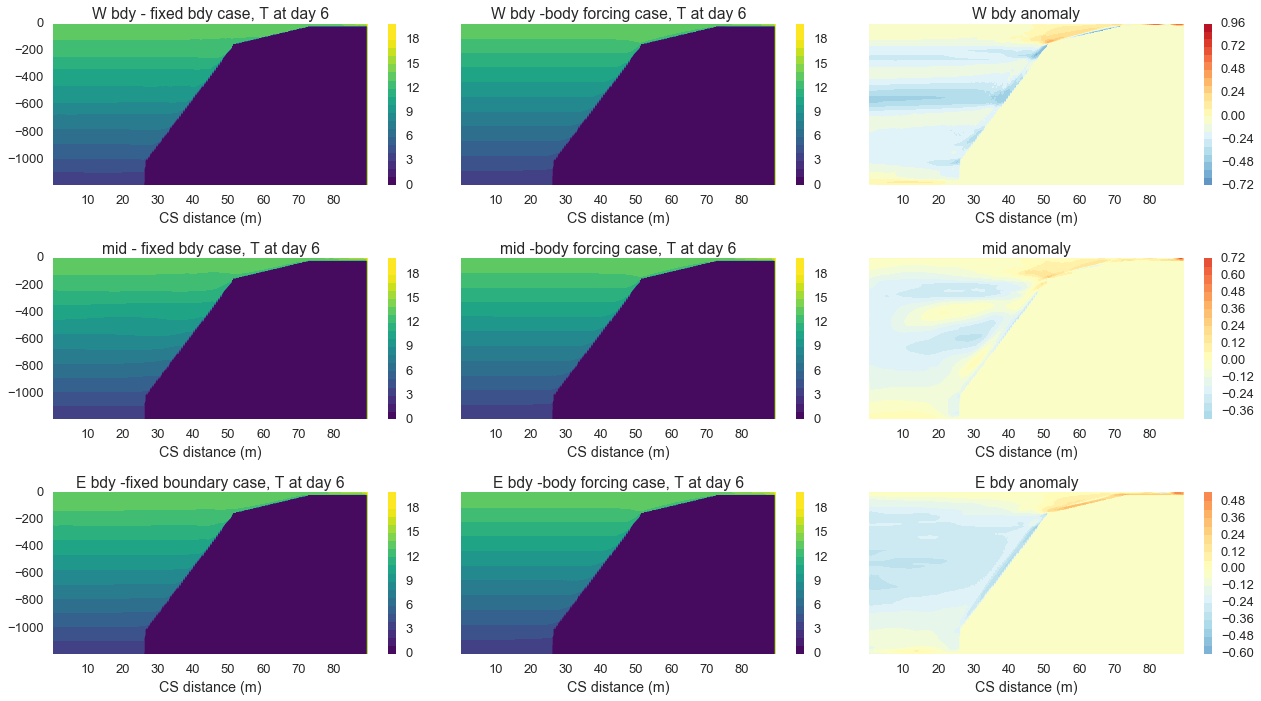

In [26]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,T_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, T at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,T_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, T at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,T_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, T at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,Tbf_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, T at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,Tbf_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, T at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,Tbf_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, T at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,Tbf_Wbdy_d6-T_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,Tbf_mid_d6-T_mid_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,Tbf_Ebdy_d6-T_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


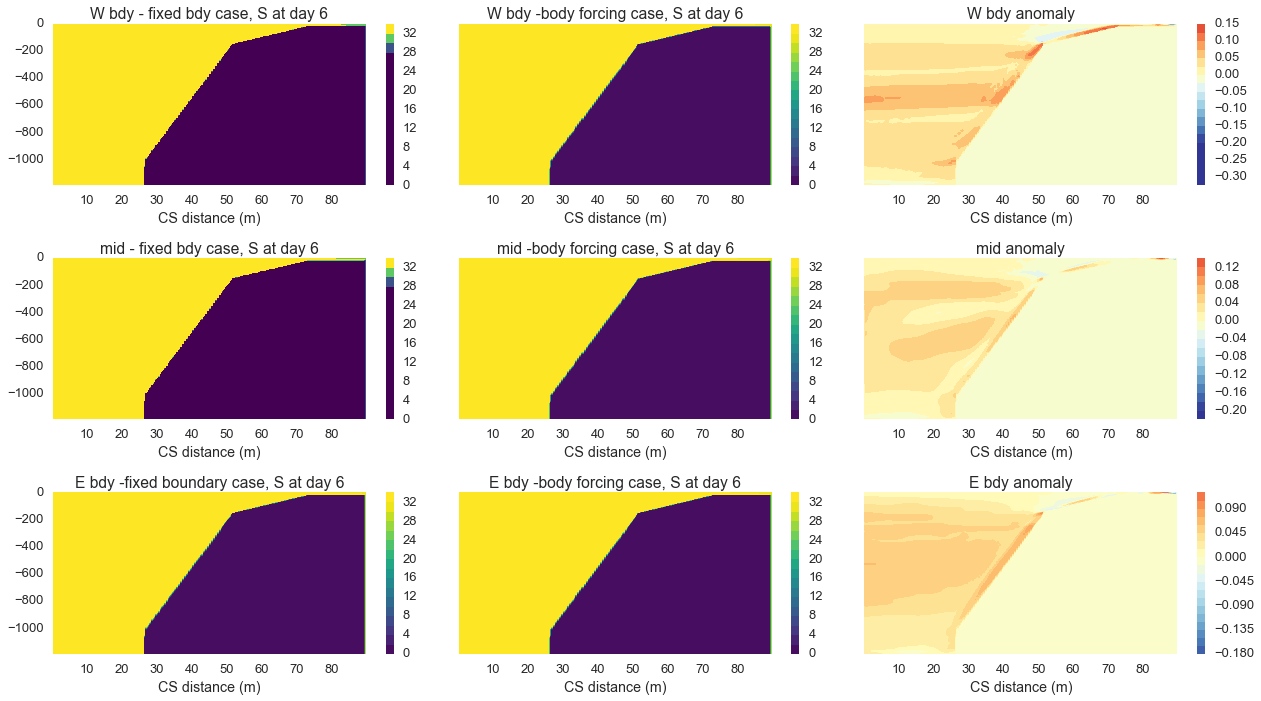

In [27]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,S_Wbdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 28)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, S at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,S_mid_d6,20, cmap = 'viridis', vmax = 32, vmin = 28)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, S at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,S_Ebdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, S at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,Sbf_Wbdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, S at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,Sbf_mid_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, S at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,Sbf_Ebdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, S at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,Sbf_Wbdy_d6-S_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,Sbf_mid_d6-S_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,Sbf_Ebdy_d6-S_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()
